In [1]:
import pandas  as pd
import numpy  as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
import matplotlib.ticker as mticker
import cmocean
import geopandas as gpd
#from shapely.geometry import
import matplotlib.colors as colors
from scipy.interpolate import Rbf
import xarray as xr
#import matplotlib.pylab as plt
%matplotlib inline
from pylab import *
from matplotlib.colors import LogNorm,PowerNorm,LinearSegmentedColormap,ListedColormap

In [2]:
with open('CN-border-La.dat') as src:
    context = src.read()
    blocks = [cnt for cnt in context.split('>') if len(cnt) > 0]
    borders = [np.fromstring(block, dtype=float, sep=' ') for block in blocks]

In [26]:
def plotMap_time(pre,year):
    lon_leftup=70;lat_leftup=59
    lon_rightdown=140;lat_rightdown=15
    res=0.1
    lon=np.arange(lon_leftup,lon_rightdown,res)
    lat=np.arange(lat_rightdown,lat_leftup,res)
    olon,olat = np.meshgrid(lon,lat)
    # add borders, coastline, rivers, lakes, and provinces of China
    proj = ccrs.PlateCarree()
    # Set figure size
    fig = plt.figure(figsize=[10, 8])
    # Set projection and plot the main figure
    ax = plt.axes(projection=proj)
    #ax.background_img(name='BM', resolution='high')
    #Zoom in
    ax.set_extent([73, 135, 15, 55])
    # Plot border lines
    for line in borders:
        ax.plot(line[0::2], line[1::2], '-', color='gray',
            transform=ccrs.Geodetic())
    # Plot gridlines
    ax.gridlines(linestyle='--')
    #Add map features
    ax.add_feature(cfeature.LAND, facecolor='0.99') #Grayscale colors can be set using 0 (black) to 1 (white)
    ax.add_feature(cfeature.LAKES, alpha=0.9)  #Alpha sets transparency (0 is transparent, 1 is solid)
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), zorder=10, linestyle=':') # mediate resolution
    ax.add_feature(cfeature.RIVERS) # low resolution
    #newcmap = cmocean.tools.crop_by_percent(cmocean.cm.oxy, 2, which='max', N=None)
    #newcmap=cmocean.cm.oxy
    #colorslist = ['#08306b','#08519c','#2171b5','#4292c6','#6baed6','#9ecae1','#c6dbef','#deebf7','#f7fbff',\
    #colorslist = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6',
    #'#ffffff','#f0f0f0','#d9d9d9','#bdbdbd','#969696','#737373','#525252','#252525','#000000']
    #newcmap = colors.LinearSegmentedColormap.from_list('mylist',colorslist,N=24)
    colorslist = ['#17becf','#9edae5','#1f77b4','#aec7e8','#ff7f0e','#ffbb78','#d62728','#ff9896',
              '#9467bd','#c5b0d5','#8c564b','#c49c94','#eeeeee','#e0e0e0','#d0d0d0','#bebebe',
              '#a6a6a6','#8e8e8e','#787878','#636363','#4d4d4d','#313131','#171717','#000000']
    newcmap = colors.LinearSegmentedColormap.from_list('mylist',colorslist,N=24)
    ##x, y, z = lon, lat, ci
    #zi = griddata((x, y), z, (matrixLon,matrixLat),method='nearest')
    #v = np.linspace(0.0, 45, 16, endpoint=True)
    levels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
    #contour=plt.pcolormesh(lon,lat,pre,
    contour=plt.contourf(lon,lat,pre,
                         #norm=PowerNorm(gamma=1./2.),
                         #norm=LogNorm(1, 100),
                         #LogNorm(vmin=pre.min(), vmax=pre.max(),clip=True),
                         levels=levels,
             transform=ccrs.PlateCarree(),cmap=newcmap,zorder=0)
    #ci.plot.pcolormesh(ax=ax)
    #clip=maskout.shp2clip(contour,ax,'/public/home/hysplit/software/MeteoInfo/map/country',"China")
    plt.colorbar(label=r'Precipation Maximum Time(0-23)',fraction=0.030, pad=0.04)
    #plt.clim(0.0,2.0)
# make legend with dummy points
    #plt.title(year+"", fontsize=20)
    #sub_ax = fig.subplots(subplot_kw=dict(projection='polar'))
    '''circle colorbar
    sub_ax = fig.add_axes([1.001, 0.18, 0.14, 0.155],projection='polar')
    azimuths = np.arange(0, 361, 1)
    zeniths = np.arange(40, 70, 1)
    values = azimuths * np.ones((30, 361))
    # Add ocean, land, rivers and lakes
    sub_ax.pcolormesh(azimuths*np.pi/180.0, zeniths, values, cmap=newcmap)
    sub_ax.set_yticks([])
    '''
    N = 24
    Precip=np.empty(N)
    for i in range(N):
        #print(i)
        Precip[i]=np.sum(pre==i)
        #print(Precip)   
    bottom = 8
    max_height = 16
    theta = np.linspace(2* np.pi/3,2 * np.pi+2* np.pi/3, N, endpoint=False)
    radii = np.log(Precip)
    width = (2*np.pi) / N
    sub_ax = fig.add_axes([1.001, 0.18, 0.14, 0.155],projection='polar')
    #ax = plt.subplot(111, polar=True)
    bars = sub_ax.bar(theta, radii, width=width, bottom=bottom)
    sub_ax.set_title('Maxmium time',loc="left",pad=24)
    # Use custom colors and opacity
    #Place Zero at Top
    sub_ax.set_theta_offset(np.pi/2)
    # Make the labels go clockwise
    sub_ax.set_theta_direction(-1)
    # Use custom colors and opacity
    ticks = ['12 AM', '3 AM', '6 AM', '9 AM','12 PM', '3 PM', '6 PM', '9 PM']
    sub_ax.set_xticklabels(ticks)
    i=np.arange(0,12)
    for i, bar in zip(colorslist, bars):
        bar.set_facecolor(i)
        print(i)
        #print(newcmap(i))
        bar.set_alpha(0.8)
    plt.savefig(year+"_cmorph.pdf",\
                bbox_inches="tight")
    return fig, ax

In [6]:
Pre=pd.read_csv("day_argmax-mean.csv",header=None,dtype=np.float32)

In [10]:
Pre=Pre.round()
#Pre=Pre-8
Pre=np.where(Pre<0,Pre+24,Pre)

/data/c03n02/cliu/software/anaconda2019/lib/python3.6/site-packages/ipykernel_launcher.py:74: RuntimeWarning: divide by zero encountered in log


#17becf
#9edae5
#1f77b4
#aec7e8
#ff7f0e
#ffbb78
#d62728
#ff9896
#9467bd
#c5b0d5
#8c564b
#c49c94
#eeeeee
#e0e0e0
#d0d0d0
#bebebe
#a6a6a6
#8e8e8e
#787878
#636363
#4d4d4d
#313131
#171717
#000000


/data/c03n02/cliu/software/anaconda2019/lib/python3.6/site-packages/matplotlib/projections/polar.py:55: RuntimeWarning: invalid value encountered in greater_equal
  r = np.where(r >= 0, r, np.nan)
/data/c03n02/cliu/software/anaconda2019/lib/python3.6/site-packages/matplotlib/projections/polar.py:55: RuntimeWarning: invalid value encountered in greater_equal
  r = np.where(r >= 0, r, np.nan)


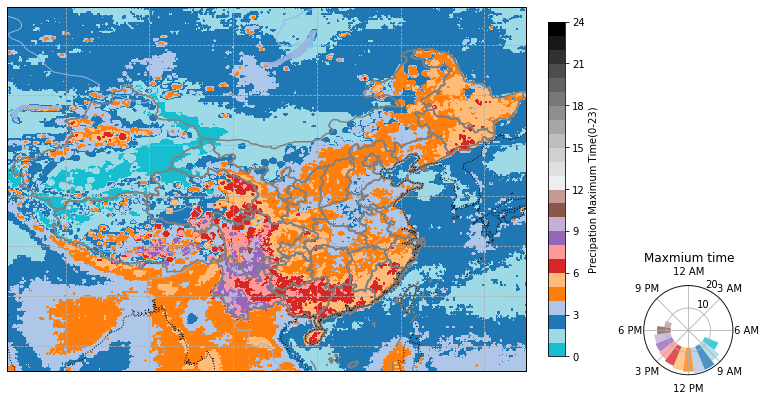

In [27]:
fig, ax= plotMap_time(Pre,"2013-2019arg-mean-new2")

/data/c03n02/cliu/software/anaconda2019/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


#17becf
#9edae5
#1f77b4
#aec7e8
#ff7f0e
#ffbb78
#d62728
#ff9896
#9467bd
#c5b0d5
#8c564b
#c49c94
#eeeeee
#e0e0e0
#d0d0d0
#bebebe
#a6a6a6
#8e8e8e
#787878
#636363
#4d4d4d
#313131
#171717
#000000


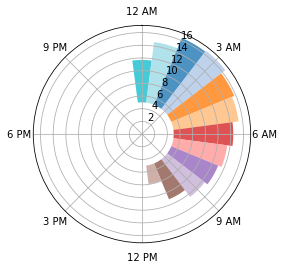

In [49]:
N = 24
bottom = 5
max_height = 4
theta = np.linspace(0.0, 2.0*np.pi,N,endpoint=False)
radii = np.log(Precip)
width = (2*np.pi) / N
#newcmap=cmocean.cm.oxy
colorslist = ['#17becf','#9edae5','#1f77b4','#aec7e8','#ff7f0e','#ffbb78','#d62728','#ff9896',
              '#9467bd','#c5b0d5','#8c564b','#c49c94','#eeeeee','#e0e0e0','#d0d0d0','#bebebe',
              '#a6a6a6','#8e8e8e','#787878','#636363','#4d4d4d','#313131','#171717','#000000']
newcmap = colors.LinearSegmentedColormap.from_list('mylist',colorslist,N=24)
ax = plt.subplot(111, polar=True)
bars = ax.bar(theta, radii, width=width, bottom=bottom)
#Place Zero at Top
ax.set_theta_offset(np.pi/2)
# Make the labels go clockwise
ax.set_theta_direction(-1)
# Use custom colors and opacity
ticks = ['12 AM', '3 AM', '6 AM', '9 AM','12 PM', '3 PM', '6 PM', '9 PM']
ax.set_xticklabels(ticks)
i=np.arange(0,12)
for i, bar in zip(colorslist, bars):
    bar.set_facecolor(i)
    print(i)
    #print(newcmap(i))
    bar.set_alpha(0.8)

plt.show()

https://stackoverflow.com/questions/56418087/how-to-plot-time-stamps-hhmm-on-python-matplotlib-clock-polar-plot

https://stackoverflow.com/questions/22562364/circular-histogram-for-python